In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('diabetes.csv' )
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset_mm = dataset.copy(deep=True)
dataset_mm[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_mm[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

dataset_mm['Glucose'].fillna(dataset_mm['Glucose'].mean(), inplace = True)
dataset_mm['BloodPressure'].fillna(dataset_mm['BloodPressure'].mean(), inplace = True)
dataset_mm['SkinThickness'].fillna(dataset_mm['SkinThickness'].median(), inplace = True)
dataset_mm['Insulin'].fillna(dataset_mm['Insulin'].median(), inplace = True)
dataset_mm['BMI'].fillna(dataset_mm['BMI'].median(), inplace = True)

In [4]:
X = dataset_mm.iloc[:, [0,1,2,3,4,5,6,7]]
Y = dataset_mm['Outcome']
Y = np.array(Y)

In [7]:
rus = RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(X, Y)
print(sorted(Counter(Y_resampled).items()))

[(0, 268), (1, 268)]


In [11]:
corr_mat=dataset_mm.corr()
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


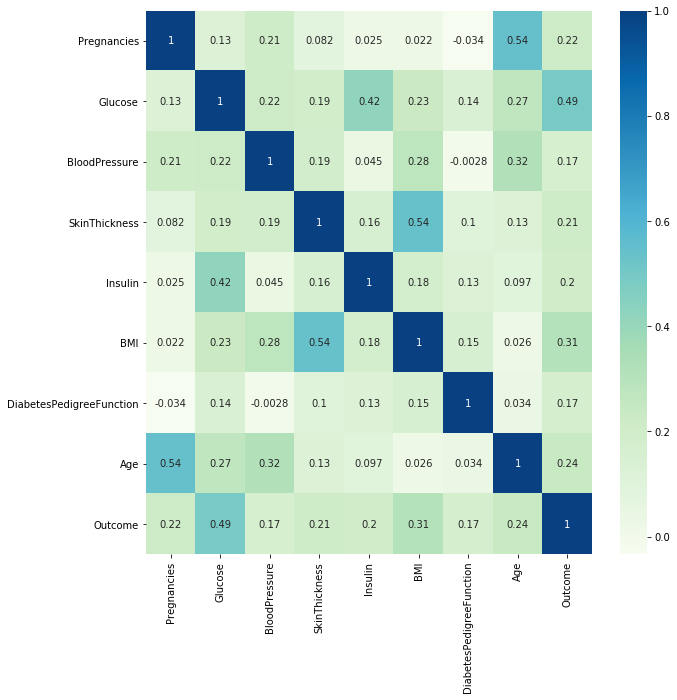

In [12]:
plt.figure(figsize=(10,10))
sb.heatmap(data=corr_mat,annot=True,cmap='GnBu')
plt.show()

In [13]:
target='Outcome'
candidates=corr_mat.index[(corr_mat[target]>0.4) | (corr_mat[target]<-0.5)].values
candidates=candidates[candidates!=target]
candidates

array(['Glucose'], dtype=object)